In [1]:
from fastai.basics import *

path = untar_data(URLs.MNIST)

In [2]:
path.ls()

(#2) [Path('/home/jvinarek/.fastai/data/mnist_png/training'),Path('/home/jvinarek/.fastai/data/mnist_png/testing')]

In [3]:
(path/'training').ls()

(#10) [Path('/home/jvinarek/.fastai/data/mnist_png/training/9'),Path('/home/jvinarek/.fastai/data/mnist_png/training/1'),Path('/home/jvinarek/.fastai/data/mnist_png/training/6'),Path('/home/jvinarek/.fastai/data/mnist_png/training/3'),Path('/home/jvinarek/.fastai/data/mnist_png/training/7'),Path('/home/jvinarek/.fastai/data/mnist_png/training/5'),Path('/home/jvinarek/.fastai/data/mnist_png/training/0'),Path('/home/jvinarek/.fastai/data/mnist_png/training/2'),Path('/home/jvinarek/.fastai/data/mnist_png/training/4'),Path('/home/jvinarek/.fastai/data/mnist_png/training/8')]

In [4]:
digits = { d: (path/'training'/f'{d}').ls().sorted() for d in range(0, 10)}
digits[9]

(#5949) [Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10003.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10004.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10023.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10028.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10038.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10043.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10047.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/1005.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10055.png'),Path('/home/jvinarek/.fastai/data/mnist_png/training/9/10059.png')...]

In [5]:
from fastai.vision.all import *

im3_path = digits[3][1]
im3 = Image.open(im3_path)
im3

In [6]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [7]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [8]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:30, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## Baseline - pixel similarity

In [9]:
digit_tensors = {d: [tensor(Image.open(o)) for o in digits[d]] for d in digits}
# three_tensors = [tensor(Image.open(o)) for o in threes]
# len(seven_tensors), len(three_tensors)

In [10]:
len(digit_tensors[0]), len(digit_tensors[1]), len(digit_tensors[9])

(5923, 6742, 5949)

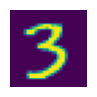

In [11]:
show_image(digit_tensors[3][1]);

In [12]:
stacked_digits = {d: torch.stack(digit_tensors[d]).float()/255 for d in digits}
[(i, stacked_digits[i].shape) for i in range(0, 10)]

[(0, torch.Size([5923, 28, 28])),
 (1, torch.Size([6742, 28, 28])),
 (2, torch.Size([5958, 28, 28])),
 (3, torch.Size([6131, 28, 28])),
 (4, torch.Size([5842, 28, 28])),
 (5, torch.Size([5421, 28, 28])),
 (6, torch.Size([5918, 28, 28])),
 (7, torch.Size([6265, 28, 28])),
 (8, torch.Size([5851, 28, 28])),
 (9, torch.Size([5949, 28, 28]))]

In [13]:
len(stacked_digits[3].shape)

3

In [14]:
stacked_digits[3].ndim

3

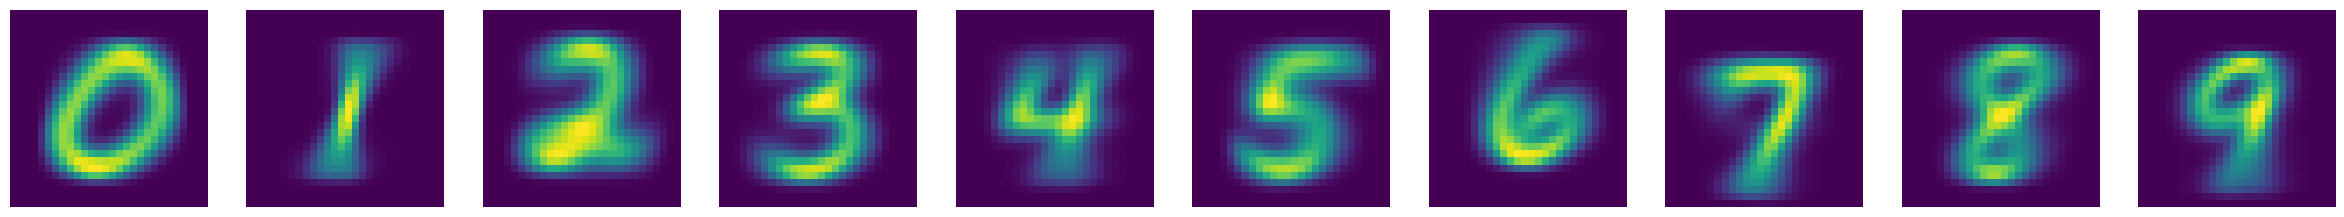

In [15]:
mean = [stacked_digits[i].mean(0) for i in digits]
show_images(mean);

In [16]:
mean[3].shape

torch.Size([28, 28])

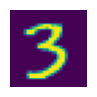

In [17]:
a_3 = stacked_digits[3][1]
show_image(a_3);

In [18]:
dist_3_abs = (a_3 - mean[3]).abs().mean()
dist_3_sqr = ((a_3 - mean[3])**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [19]:
F.l1_loss(a_3.float(), mean[7]), F.mse_loss(a_3, mean[7]).sqrt()

(tensor(0.1586), tensor(0.3021))

In [20]:
valid_stacked_digits = {d: torch.stack([tensor(Image.open(o)).float()/255 for o in (path/'testing'/f'{d}').ls()]) for d in digits}

[(d, valid_stacked_digits[d].shape) for d in valid_stacked_digits]

[(0, torch.Size([980, 28, 28])),
 (1, torch.Size([1135, 28, 28])),
 (2, torch.Size([1032, 28, 28])),
 (3, torch.Size([1010, 28, 28])),
 (4, torch.Size([982, 28, 28])),
 (5, torch.Size([892, 28, 28])),
 (6, torch.Size([958, 28, 28])),
 (7, torch.Size([1028, 28, 28])),
 (8, torch.Size([974, 28, 28])),
 (9, torch.Size([1009, 28, 28]))]

In [21]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))

mnist_distance(a_3, mean[3])

tensor(0.1114)

In [22]:
valid_3_dist = mnist_distance(valid_stacked_digits[3], mean[3])
valid_3_dist, valid_3_dist.shape

(tensor([0.1072, 0.1188, 0.1143,  ..., 0.1141, 0.1299, 0.1079]),
 torch.Size([1010]))

In [23]:
mnist_distance(valid_stacked_digits[3], mean[3]).shape, mnist_distance(valid_stacked_digits[3], mean[4]).shape

(torch.Size([1010]), torch.Size([1010]))

In [24]:
def get_digit_distance(x):
    dist = [mnist_distance(x, mean[i]) for i in range(0, 10)]
    return torch.stack(dist).t()

get_digit_distance(a_3)

tensor([0.1879, 0.1353, 0.1734, 0.1114, 0.1704, 0.1443, 0.1723, 0.1586, 0.1550,
        0.1601])

In [25]:
get_digit_distance(stacked_digits[3][:5])

tensor([[0.1750, 0.1153, 0.1501, 0.1074, 0.1635, 0.1326, 0.1579, 0.1441, 0.1345,
         0.1402],
        [0.1879, 0.1353, 0.1734, 0.1114, 0.1704, 0.1443, 0.1723, 0.1586, 0.1550,
         0.1601],
        [0.1644, 0.1433, 0.1583, 0.1100, 0.1642, 0.1364, 0.1749, 0.1541, 0.1343,
         0.1580],
        [0.1764, 0.1553, 0.1643, 0.1154, 0.1637, 0.1491, 0.1698, 0.1669, 0.1437,
         0.1527],
        [0.1731, 0.1431, 0.1531, 0.1300, 0.1880, 0.1638, 0.1670, 0.1680, 0.1707,
         0.1808]])

In [26]:
get_digit_distance(stacked_digits[3])

tensor([[0.1750, 0.1153, 0.1501,  ..., 0.1441, 0.1345, 0.1402],
        [0.1879, 0.1353, 0.1734,  ..., 0.1586, 0.1550, 0.1601],
        [0.1644, 0.1433, 0.1583,  ..., 0.1541, 0.1343, 0.1580],
        ...,
        [0.1793, 0.1582, 0.1610,  ..., 0.1792, 0.1474, 0.1682],
        [0.1531, 0.1253, 0.1451,  ..., 0.1548, 0.1519, 0.1636],
        [0.1655, 0.1257, 0.1459,  ..., 0.1509, 0.1496, 0.1622]])

In [27]:
def get_digit(x):
    return torch.argmin(get_digit_distance(x), dim=1)

get_digit(stacked_digits[3][:5])

tensor([3, 3, 3, 3, 3])

In [28]:
accuracy = [(get_digit(valid_stacked_digits[i]) == i).float().mean() for i in range(0, 10)]
tensor(accuracy).mean()

tensor(0.6610)

## MNIST loss function

In [29]:
F.one_hot(tensor(2), num_classes=10)

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [30]:
train_x = torch.cat([stacked_digits[i] for i in range(0, 10)]).view(-1, 28*28)
train_y = tensor([item for sublist in [[i]*len(stacked_digits[i]) for i in range(0, 10)] for item in sublist]).unsqueeze(1)
train_y = F.one_hot(train_y)

train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1, 10]))

In [31]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [32]:
valid_x = torch.cat([valid_stacked_digits[i] for i in range(0, 10)]).view(-1, 28*28)
valid_y = tensor([item for sublist in [[i]*len(valid_stacked_digits[i]) for i in range(0, 10)] for item in sublist]).unsqueeze(1)
valid_y = F.one_hot(valid_y)

valid_dset = list(zip(valid_x, valid_y))

In [33]:
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 10))
weights.shape

torch.Size([784, 10])

In [34]:
bias = init_params(10)
bias

tensor([ 1.7837,  1.0799,  0.8421,  0.7839,  0.7786,  0.6337, -0.2769,  1.4506,
         0.2980,  0.9212], requires_grad=True)

In [35]:
(train_x[0] * weights.T).sum() + bias

tensor([-77.9565, -78.6602, -78.8980, -78.9562, -78.9616, -79.1064, -80.0171,
        -78.2896, -79.4421, -78.8190], grad_fn=<AddBackward0>)

In [36]:
def linear1(xb):
    return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[-20.6389,  -4.0007, -23.0729,  ...,  -5.8061,  -7.0488,  -4.0346],
        [ -3.4853,  -7.5395,  -0.6658,  ...,   4.2509,   0.0364,  -0.1386],
        [-35.3979, -10.4865, -29.6204,  ..., -13.8063, -14.6209, -17.1771],
        ...,
        [ -2.3912,   6.3752, -13.4905,  ...,  -5.2491,  -6.9944,   4.2710],
        [-31.2156, -10.2723,  -2.1517,  ...,  -7.1069, -11.6009,  -4.0687],
        [ -6.1078,   3.6449,  -5.5461,  ...,   5.5610, -10.6828,   4.9230]],
       grad_fn=<AddBackward0>)

In [37]:
torch.argmax(train_y, dim=2)

tensor([[0],
        [0],
        [0],
        ...,
        [9],
        [9],
        [9]])

In [38]:
torch.argmax(preds, dim=1).unsqueeze(-1)

tensor([[5],
        [7],
        [5],
        ...,
        [6],
        [6],
        [6]])

In [39]:
corrects = torch.argmax(preds, dim=1).unsqueeze(-1) == torch.argmax(train_y, dim=2)
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [40]:
corrects.float().mean().item()

0.10180000215768814

In [41]:
# weights[0] *= 1.0001

# preds = linear1(train_x)
# ((preds > 0.0).float() == train_y).float().mean().item()

In [42]:
trgts = F.one_hot(tensor([3, 0, 5]), num_classes=10)
prds = torch.randn(3, 10)

trgts, prds

(tensor([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]),
 tensor([[-0.2000, -0.1533, -0.0831, -1.1975,  1.8262,  1.1356, -0.0631,  1.3458,
          -0.0741, -0.6194],
         [-0.3325, -1.9227,  0.6175, -1.6173, -1.5775,  0.3451, -1.9291, -0.5532,
          -0.8933, -0.4973],
         [-1.5415, -0.8740,  0.8409,  0.2079,  0.9408, -2.0108,  0.3416, -0.6664,
           1.1605, -0.8380]]))

In [43]:
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

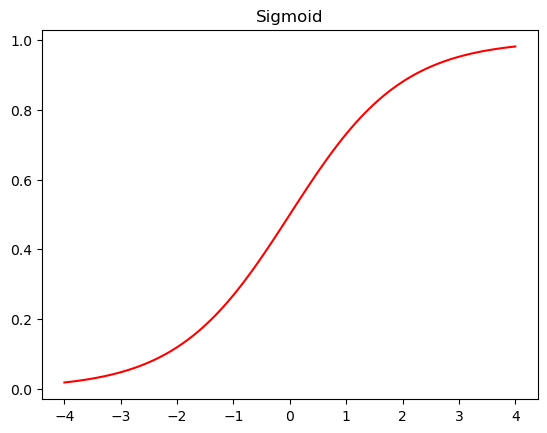

In [44]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [45]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    
    return (targets - predictions).abs().mean()

mnist_loss(prds, trgts)

tensor(0.4879)

## SGD and mini-batches

In [46]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([12,  8,  1,  0,  7]),
 tensor([14,  5, 11, 13,  9]),
 tensor([10,  4,  2,  3,  6])]

In [47]:
list(enumerate([10, 20, 30]))

[(0, 10), (1, 20), (2, 30)]

In [48]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [49]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([18,  7,  3,  4,  1, 23]), ('s', 'h', 'd', 'e', 'b', 'x')),
 (tensor([17, 12,  9, 19,  5, 22]), ('r', 'm', 'j', 't', 'f', 'w')),
 (tensor([11, 16,  0, 14,  2, 15]), ('l', 'q', 'a', 'o', 'c', 'p')),
 (tensor([21,  6,  8, 24, 20, 10]), ('v', 'g', 'i', 'y', 'u', 'k')),
 (tensor([25, 13]), ('z', 'n'))]

## Putting it all together

In [50]:
weights = init_params((28*28, 10))
bias = init_params(10)

weights.shape, bias

(torch.Size([784, 10]),
 tensor([ 0.7577, -0.2961, -0.7289, -0.5233,  0.6951, -0.5947,  0.2024,  0.4082,
         -1.0108,  0.9523], requires_grad=True))

In [51]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1, 10]))

In [52]:
??first

In [53]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [54]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [55]:
preds = linear1(batch)
preds

tensor([[ -3.8489,   5.1918,  -3.9641,   4.6946,  -9.3191,  -0.4700,  -9.8440,
          28.4945,  -3.8503,  -9.7169],
        [  0.4293, -11.4024,  -4.9183,  21.4768,  -6.0328,  -3.1483,   0.4441,
          23.8904,   4.2893,   2.8863],
        [ -1.2646,   4.6752, -12.2016,   7.6305, -13.2067,   5.2890,  -0.0567,
          38.1005, -12.8861,  -4.8342],
        [  4.8270,  -1.5242,  -4.8307,  19.6544, -22.7353, -11.5530, -11.2700,
          17.4724, -13.4444,   5.3103]], grad_fn=<AddBackward0>)

In [56]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.4456, grad_fn=<MeanBackward0>)

In [57]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 10]),
 tensor(0.0003),
 tensor([-1.0971e-02,  4.0380e-03,  8.3376e-04,  2.3661e-04,  6.1969e-05,
          7.0289e-03,  1.2198e-02,  0.0000e+00,  8.4365e-04,  1.5707e-03]))

In [58]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [59]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(0.0005),
 tensor([-0.0219,  0.0081,  0.0017,  0.0005,  0.0001,  0.0141,  0.0244,  0.0000,
          0.0017,  0.0031]))

In [60]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(0.0008),
 tensor([-0.0329,  0.0121,  0.0025,  0.0007,  0.0002,  0.0211,  0.0366,  0.0000,
          0.0025,  0.0047]))

In [61]:
weights.grad.zero_()
bias.grad.zero_();

In [62]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [63]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = torch.argmax(preds, dim=1).unsqueeze(-1) == torch.argmax(yb, dim=2)
    return correct.float().mean()

In [64]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [65]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.0916

In [66]:
lr = 2.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.1671

In [67]:
for i in range(5):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end= ' ')

0.2302 0.264 0.283 0.2979 0.309 

## Creating an Optimizer

In [68]:
linear_model = nn.Linear(28*28, 10)

w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([10, 784]), torch.Size([10]))

In [69]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None
            

opt = BasicOptim(linear_model.parameters(), lr)

def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [70]:
validate_epoch(linear_model)

0.0568

In [71]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [72]:
# train_model(linear_model, 20)

In [73]:
dls = DataLoaders(dl, valid_dl)

In [74]:
learn = Learner(dls, nn.Linear(28*28, 10), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [75]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.100812,0.100458,0.358400,00:01
1,0.100230,0.098444,0.345000,00:01
2,0.099841,0.096185,0.344100,00:01
3,0.099655,0.094133,0.349600,00:01
4,0.099628,0.092489,0.352900,00:01
5,0.099623,0.091192,0.354600,00:01
6,0.099624,0.090161,0.356100,00:01
7,0.099626,0.089329,0.357300,00:01
8,0.099629,0.088649,0.358100,00:01
9,0.099632,0.088084,0.359800,00:01


## Adding a Nonlinearity

In [76]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 10))
b2 = init_params(10)

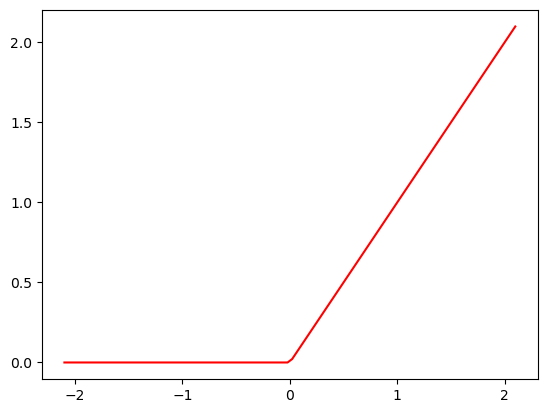

In [77]:
plot_function(F.relu)

In [78]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
)

In [79]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.112810,0.105187,0.182400,00:01
1,0.102307,0.102057,0.171900,00:01
2,0.101237,0.101248,0.135100,00:01
3,0.100840,0.100887,0.120700,00:01
4,0.100631,0.100684,0.115900,00:01
5,0.100503,0.100555,0.114100,00:01
6,0.100417,0.100466,0.113500,00:01
7,0.100356,0.100401,0.113500,00:01
8,0.100309,0.100352,0.113500,00:01
9,0.100273,0.100313,0.113500,00:01


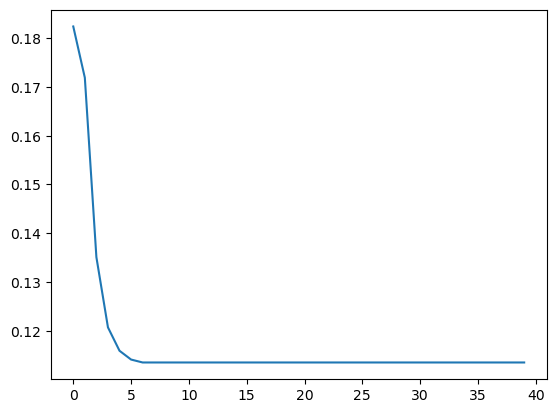

In [80]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [81]:
learn.recorder.values[-1][2]

0.11349999904632568

In [82]:
path

Path('/home/jvinarek/.fastai/data/mnist_png')

In [83]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/home/jvinarek/mambaforge/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/jvinarek/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jvinarek/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,None,None,None,None,None,None,None,None,None,None,time


KeyboardInterrupt: 